In [3]:
import mne
import numpy as np
import scipy.io as sio
import rca
import rcaplot

In [5]:
if __name__ == "__main__":
    paths = ["sample_data/mra_p000_run0-epo.fif",
             "sample_data/mra_p001_run0-epo.fif", 
             "sample_data/mra_p002_run0-epo.fif", 
             "sample_data/mra_p003_run0-epo.fif",
             "sample_data/mra_p004_run0-epo.fif",
             "sample_data/mra_p005_run0-epo.fif"]
    result = np.ndarray((3, 6), dtype=np.ndarray)
    ch_names = None
    for i, path in enumerate(paths):
        epochs = mne.read_epochs(path)
        data = epochs.pick("eeg").get_data()
        if ch_names == None:
            ch_names = epochs.pick("eeg").ch_names
        data = np.transpose(data, (2, 1, 0))
        aligned_data = data[:, :, :48]
        rotated_data = None
        mirrored_data = None
        if i % 2 == 0:
            rotated_data = data[:, :, 96:185]
            mirrored_data = data[:, :, 282:371]
        else:
            rotated_data = data[:, :, 282:371]
            mirrored_data = data[:, :, 96:185]
        result[0, i] = np.array(aligned_data, dtype=np.float32, order="F")
        result[1, i] = np.array(rotated_data, dtype=np.float32, order="F")
        result[2, i] = np.array(mirrored_data, dtype=np.float32, order="F")


Reading F:\Documents\Science\MirRevAdaptEEG\ana\sample_data\mra_p000_run0-epo.fif ...
    Found the data of interest:
        t =   -2000.00 ...    1995.00 ms
        0 CTF compensation matrices available
Not setting metadata
420 matching events found
No baseline correction applied
0 projection items activated
Reading F:\Documents\Science\MirRevAdaptEEG\ana\sample_data\mra_p001_run0-epo.fif ...
    Found the data of interest:
        t =   -2000.00 ...    1995.00 ms
        0 CTF compensation matrices available
Not setting metadata
420 matching events found
No baseline correction applied
0 projection items activated
Reading F:\Documents\Science\MirRevAdaptEEG\ana\sample_data\mra_p002_run0-epo.fif ...
    Found the data of interest:
        t =   -2000.00 ...    1995.00 ms
        0 CTF compensation matrices available
Not setting metadata
420 matching events found
No baseline correction applied
0 projection items activated
Reading F:\Documents\Science\MirRevAdaptEEG\ana\sample_data\mra_

In [9]:
#sio.savemat("sample_train_on_fif.mat", {"data": result})
model = rca.RCA()
out = model.fit_transform(result, cov_process_num=4)

selected  3  conditions and  6  subjects for training
process number: 4
computing covariances for condition  0  and subject  0
computing covariances for condition  0  and subject  1
computing covariances for condition  0  and subject  2
computing covariances for condition  0  and subject  3
computing covariances for condition  0  and subject  4
computing covariances for condition  0  and subject  5
computing covariances for condition  1  and subject  0
computing covariances for condition  1  and subject  1
computing covariances for condition  1  and subject  2
computing covariances for condition  1  and subject  3
computing covariances for condition  1  and subject  4
computing covariances for condition  1  and subject  5
computing covariances for condition  2  and subject  0
computing covariances for condition  2  and subject  1
computing covariances for condition  2  and subject  2
computing covariances for condition  2  and subject  3
computing covariances for condition  2  and subj

F:\Documents\Science\MirRevAdaptEEG\ana\rca.py:135: RuntimeWarning: invalid value encountered in divide
  bfwd = -(np.multiply(sigma_x, sigma_xy) - np.multiply(sigma_xx, sigma_y)) / det
F:\Documents\Science\MirRevAdaptEEG\ana\rca.py:136: RuntimeWarning: invalid value encountered in divide
  
F:\Documents\Science\MirRevAdaptEEG\ana\rca.py:144: RuntimeWarning: invalid value encountered in divide
  bbck = np.flipud((np.multiply(sigma_xx, sigma_y) - np.multiply(sigma_x, sigma_xy)) / det)
F:\Documents\Science\MirRevAdaptEEG\ana\rca.py:145: RuntimeWarning: invalid value encountered in divide
  error_curve = np.empty(len(y))
F:\Documents\Science\MirRevAdaptEEG\ana\rca.py:211: ComplexWarning: Casting complex values to real discards the imaginary part
  vGen = vGen.astype(np.float32)
F:\Documents\Science\MirRevAdaptEEG\ana\rca.py:212: ComplexWarning: Casting complex values to real discards the imaginary part
  


AttributeError: module 'rcaplot' has no attribute 'plotForwardModel'

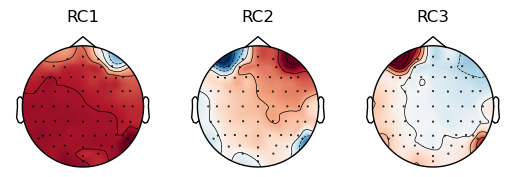

In [13]:
rcaplot.plotForwardModelTopo(model.A_, "biosemi64", ch_names)

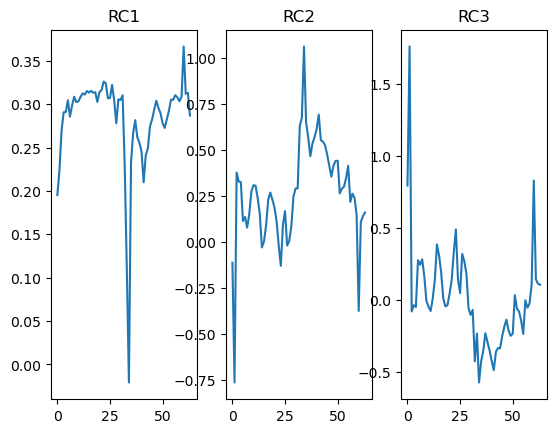

In [15]:
rcaplot.plotForwardModelOriginal(model.A_)

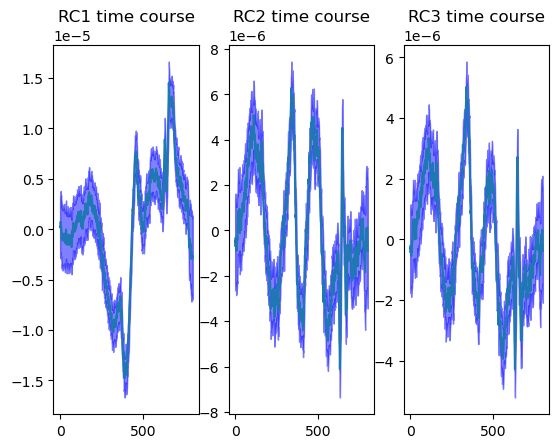

In [19]:
rcaplot.plotTimeCourse(out)

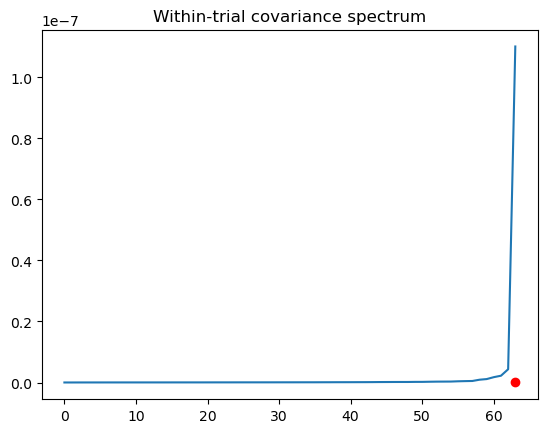

In [20]:
rcaplot.plotWithinTrialCovarianceSpectrum(model)

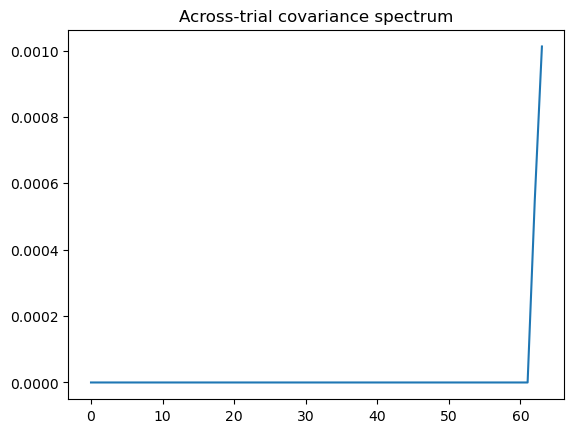

In [21]:
rcaplot.plotAcrossTrialCovarianceSpectrum(model)

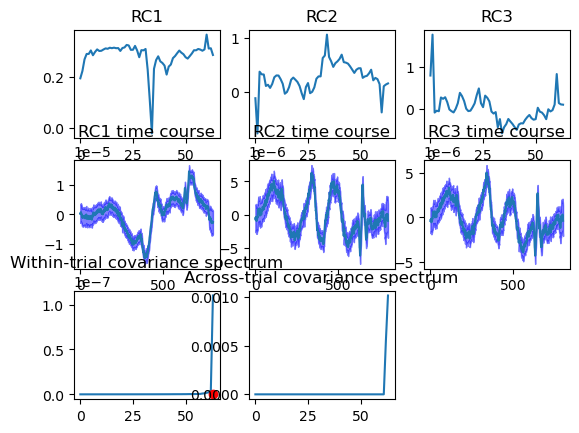

In [23]:
rcaplot.plotRCA(model, out, 'biosemi64')

In [30]:
rcaplot.plotComparisionElectrodes(out)

ValueError: operands could not be broadcast together with shapes (800,3,48) (800,3,89) 